In [1]:
import pandas as pd
import numpy as np
import numpy.random as nrand
import matplotlib
#matplotlib.use('Agg')
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle as pkl
from multiprocessing import Pool
import seaborn as sns
import itertools

In [2]:
rcParams_dict = {
    'xtick.bottom': True,
    'patch.edgecolor':'k',
    'patch.force_edgecolor': True,
    'font.size': 15,
    'pdf.fonttype':42,
    'font.family':'Arial',
    'mathtext.fontset':'custom',
    'mathtext.default': 'regular',
    'mathtext.it': 'Arial:italic',
    'mathtext.it': 'Arial:italic',
}
mpl.rcParams.update(rcParams_dict)

In [3]:
with open('./data/TajimasD_dict.pkl','rb') as f:
    TajimasD_dict = pkl.load(f)
with open('./data/FuLisD_dict.pkl','rb') as f:
    FuLisD_dict = pkl.load(f)
with open('./data/FayWusH_dict.pkl','rb') as f:
    FayWusH_dict = pkl.load(f)
with open('./data/ZengsE_dict.pkl','rb') as f:
    ZengsE_dict = pkl.load(f)
with open('./data/H12_dict.pkl','rb') as f:
    H12_dict = pkl.load(f)

In [5]:
def stat_comparism(xmin,xmax,y,P,ax): 
    ymin,ymax = ax.get_ylim()
    height = (ymax-ymin)/50
    ax.plot([xmin,xmax],[y,y],'k')
    ax.plot([xmin,xmin],[y-height,y],'k')
    ax.plot([xmax,xmax],[y-height,y],'k')
    
    if P < 0.0005:
        sig_txt = '***'
    elif P < 0.005:
        sig_txt = '**'
    elif P < 0.05:
        sig_txt = '*'
    else:
        sig_txt = 'ns'
    ax.text((xmin+xmax)/2,y,sig_txt, va='bottom',ha='center')
    
def four_stat_comparism(ax,P_list):
    assert len(P_list) == 4
    ymin,ymax = ax.get_ylim()
    y_basal = (3*ymax+1*ymin)/4
    y_space = (ymax-ymin)/11
    stat_comparism(1,2,y_basal,P_list[0],ax)
    stat_comparism(1,3,y_basal+y_space,P_list[1],ax)
    stat_comparism(2,4,y_basal+2*y_space,P_list[2],ax)
    stat_comparism(3,4,y_basal,P_list[3],ax)
    
def get_P_list(S_dict):
    t,P1 = stats.ttest_ind(S_dict['Neutral'],S_dict['AdapTrack'])
    t,P2 = stats.ttest_ind(S_dict['Neutral'],S_dict['AdapTrack_env20'])
    t,P3 = stats.ttest_ind(S_dict['AdapTrack'],S_dict['Adaptive'])
    t,P4 = stats.ttest_ind(S_dict['AdapTrack_env20'],S_dict['Adaptive'])
    return [P1,P2,P3,P4]

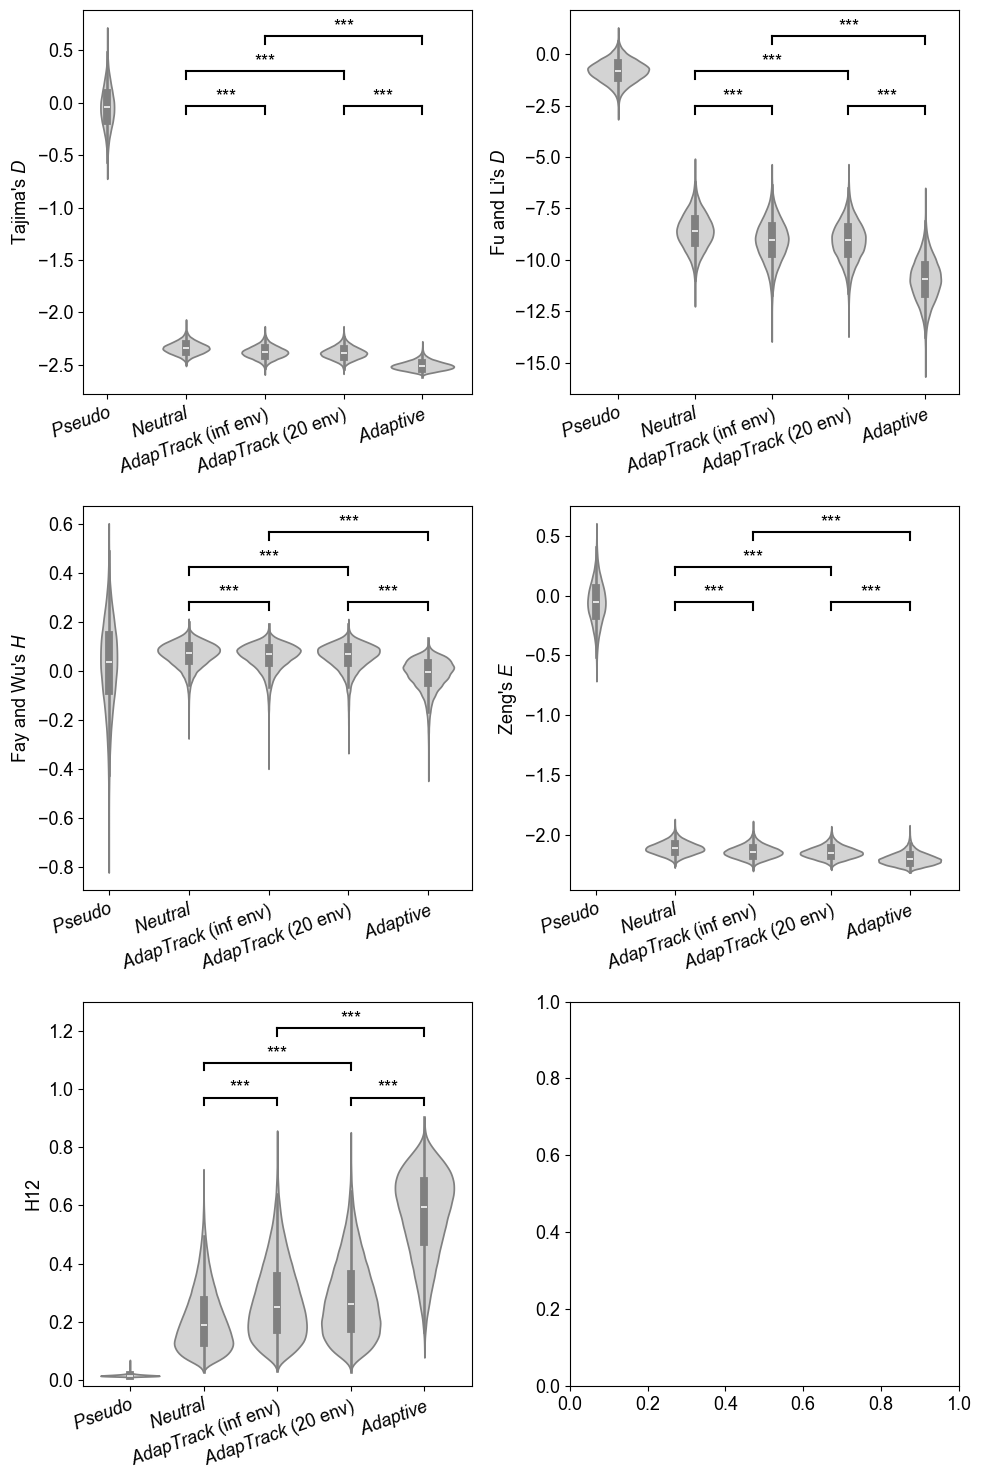

In [6]:
version_list = ['Pseudo','Neutral','AdapTrack','AdapTrack_env20','Adaptive']
label_dict = {
    'Pseudo':'$\mathit{Pseudo}$',
    'Neutral':'$\mathit{Neutral}$',
    'AdapTrack':'$\mathit{AdapTrack}$ (inf env)',
    'AdapTrack_env20':'$\mathit{AdapTrack}$ (20 env)',
    'Adaptive':'$\mathit{Adaptive}$'
}

ylabel_list = ["Tajima's $\mathit{D}$", "Fu and Li's $\mathit{D}$",
               "Fay and Wu's $\mathit{H}$", "Zeng's $\mathit{E}$", "H12"]
dict_list = [TajimasD_dict, FuLisD_dict, FayWusH_dict, ZengsE_dict, H12_dict]

fig, axes = plt.subplots(3, 2, figsize=[10, 15], facecolor='w')

for i,ax in enumerate(axes.flatten()):
    if i == 5:
        break
    S_dict = dict_list[i]
    if i == 4:
        scale = 'width'
        ax.set_ylim(-0.02,1.3)
    else:
        scale = 'area'
    sns.violinplot(data=[S_dict[version] for version in version_list],
                   color='lightgrey', linecolor='grey', ax=ax, cut=0, density_norm=scale, )
    ax.set_xticks(range(len(label_dict)), label_dict.values(), rotation=20, rotation_mode="anchor", ha='right')
    ax.set_ylabel(ylabel_list[i])
    P_list = get_P_list(S_dict)
    four_stat_comparism(ax,P_list)
    
plt.tight_layout()
#plt.savefig('./FigS10.pdf')